#### MNIST
###### has basically provided images for practice . this is provided by tensorflow. each image is 28*28 size, and it is hand written number image.

In [15]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot="True")

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [57]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [58]:
# mnist has 55000 training images
#  5000 validation images
#  10000 test images

mnist.train.num_examples

55000

In [59]:
mnist.test.num_examples

10000

In [60]:
mnist.train.images.shape

(55000, 784)

In [61]:
#  grab one image
mnist.train.images[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [62]:
#  image is originally  28 * 28 size 
single_image =  mnist.train.images[1].reshape(28,28)
single_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

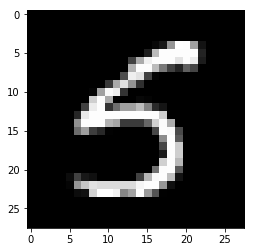

In [63]:
import matplotlib.pyplot as plt

# for gray image cmap="gist_gray"
plt.imshow(single_image, cmap="gist_gray")

In [64]:
# placeholders

x = tf.placeholder(tf.float32, shape=[None, 784])
y_true = tf.placeholder(tf.float32, shape =[None, 10])

In [65]:
# variables
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

In [66]:
# graph operation

y_pred = tf.matmul(x,w)+b

In [67]:
# loss function

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels= y_true, logits = y_pred))

In [68]:
# optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.5)
train = optimizer.minimize(cross_entropy)

In [69]:
init = tf.global_variables_initializer()

In [73]:
# tf session

with tf.Session() as sess:
    sess.run(init)
    
    for step in range(1000):
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train, feed_dict = {x:batch_x, y_true:batch_y})
    
#     tf.argmax return index of largest number. axis 1 means "in column"
#     tf.equal compares two matrix
    correct_predictions = tf.equal(tf.argmax(y_true,1), tf.argmax(y_pred,1))  
    
#     tf.cast do casting data 
#  especially, in this case classes are 2, so if we get mean value of two classes correct , incorrect, will be accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
    
    print(sess.run(accuracy, feed_dict= {x:mnist.test.images, y_true:mnist.test.labels}))
    
    

0.9146
